In [3]:
from utils import *
# Deactivate warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv("data_W2023.csv")
df.columns = ["date", "USDCAD"]

In [5]:
df = df[df["date"] < "2020-01-01"]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 564 entries, 0 to 563
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    564 non-null    object 
 1   USDCAD  564 non-null    float64
dtypes: float64(1), object(1)
memory usage: 13.2+ KB


In [7]:
df["date"] = pd.to_datetime(df["date"])

In [8]:
df["log_100_USDCAD"] = np.log(100 * df["USDCAD"])

In [9]:
df.tail()

,date,USDCAD,log_100_USDCAD
559,2019-08-01,1.028977,4.633736
560,2019-09-01,1.023574,4.628470
561,2019-10-01,1.022401,4.627324
562,2019-11-01,1.024087,4.628971
563,2019-12-01,1.018995,4.623987


Text(0.5, 1.0, 'log 100 USDCAD=x')

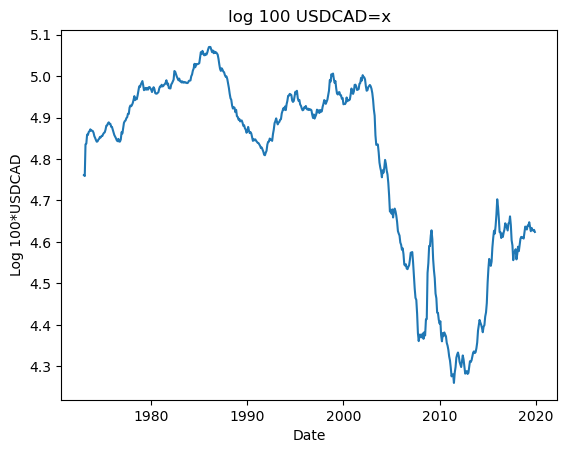

In [10]:
plt.plot(df["date"], df["log_100_USDCAD"])
plt.xlabel("Date")
plt.ylabel(f"Log 100*USDCAD")
plt.title("log 100 USDCAD=x")


In [11]:
#1b
T = df.shape[0]
T

564

In [12]:
trend = np.arange(1, T + 1)
ones = np.ones(T)

In [13]:
X = np.column_stack((ones, trend, trend ** 2))
X

array([[1.00000e+00, 1.00000e+00, 1.00000e+00],
       [1.00000e+00, 2.00000e+00, 4.00000e+00],
       [1.00000e+00, 3.00000e+00, 9.00000e+00],
       ...,
       [1.00000e+00, 5.62000e+02, 3.15844e+05],
       [1.00000e+00, 5.63000e+02, 3.16969e+05],
       [1.00000e+00, 5.64000e+02, 3.18096e+05]])

In [14]:
Y = df["log_100_USDCAD"].values

In [15]:
B = np.linalg.inv(X.T @ X) @ X.T @ Y

In [16]:
B

array([ 4.90909695e+00,  7.33070085e-04, -3.06987062e-06])

In [17]:
df["res"] = Y - X @ B

In [18]:
df

,date,USDCAD,log_100_USDCAD,res
0,1973-01-01,1.168677,4.761042,-0.148785
1,1973-02-01,1.166112,4.758845,-0.151705
2,1973-03-01,1.258816,4.835342,-0.075927
3,1973-04-01,1.260858,4.836962,-0.075018
4,1973-05-01,1.288661,4.858774,-0.053912
...,...,...,...,...
559,2019-08-01,1.028977,4.633736,0.276831
560,2019-09-01,1.023574,4.628470,0.274274
561,2019-10-01,1.022401,4.627324,0.275842
562,2019-11-01,1.024087,4.628971,0.280210


Text(0.5, 1.0, 'Determinist trend deviation')

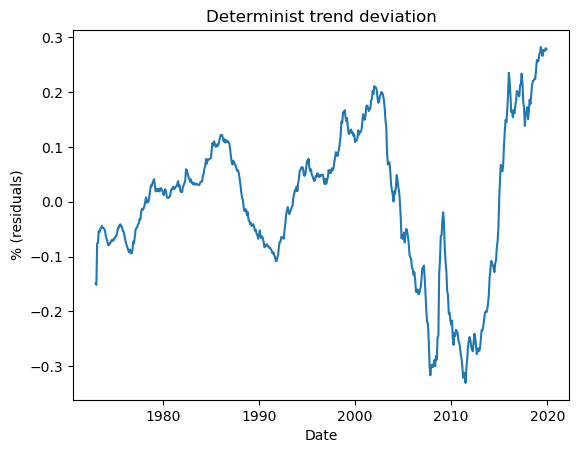

In [19]:
plt.plot(df["date"], df["res"])
plt.xlabel("Date")
plt.ylabel(f"% (residuals)")
plt.title("Determinist trend deviation")

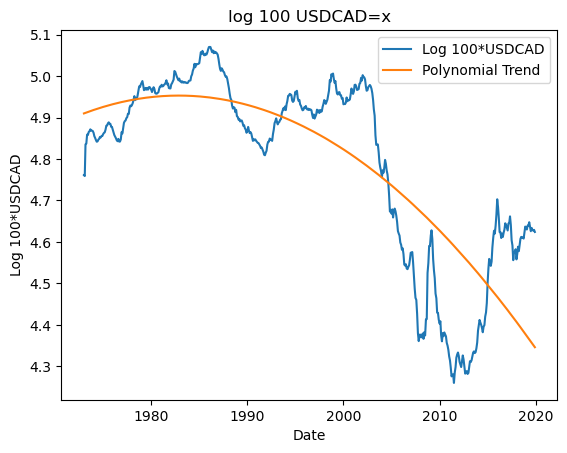

In [20]:
plt.plot(df["date"], df["log_100_USDCAD"], label="Log 100*USDCAD")
plt.plot(df["date"], X @ B, label="Polynomial Trend")
plt.xlabel("Date")
plt.ylabel(f"Log 100*USDCAD")
plt.title("log 100 USDCAD=x")
plt.legend()


In [21]:
#1c
df["stoch_USDCAD"] = df["log_100_USDCAD"].diff() * 100
df.dropna(inplace=True) # drop first row
df.shape


(563, 5)

In [22]:
df.head()

,date,USDCAD,log_100_USDCAD,res,stoch_USDCAD
1,1973-02-01,1.166112,4.758845,-0.151705,-0.219688
2,1973-03-01,1.258816,4.835342,-0.075927,7.649618
3,1973-04-01,1.260858,4.836962,-0.075018,0.162085
4,1973-05-01,1.288661,4.858774,-0.053912,2.181160
5,1973-06-01,1.287592,4.857944,-0.055441,-0.083011


Text(0.5, 1.0, 'Hypothesis: stochastic trend')

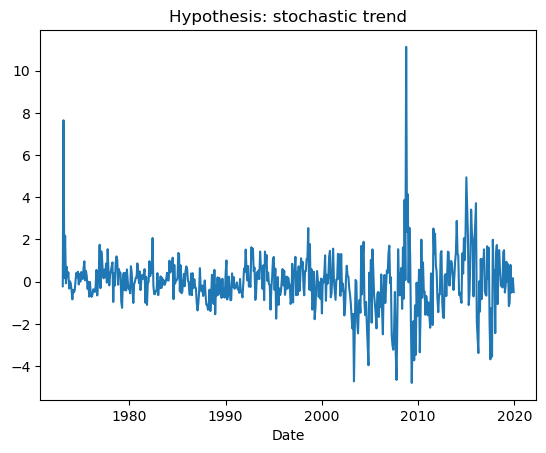

In [23]:
plt.plot(df["date"], df["stoch_USDCAD"])
plt.xlabel("Date")
plt.title("Hypothesis: stochastic trend")

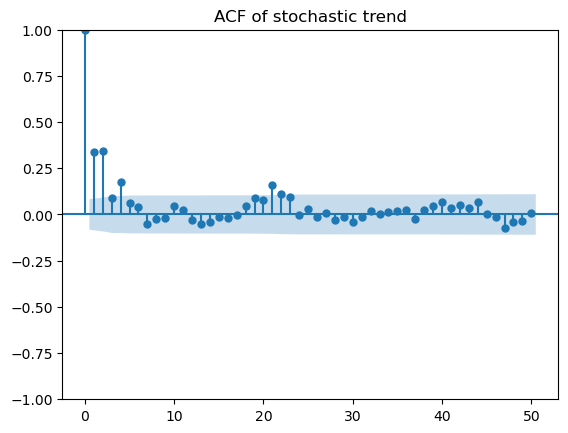

In [24]:
# 1d
sm.graphics.tsa.plot_acf(df["stoch_USDCAD"].dropna(), lags=50, title="ACF of stochastic trend");


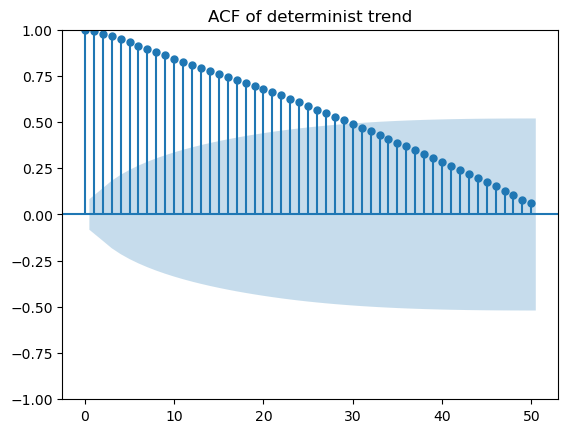

In [25]:
sm.graphics.tsa.plot_acf(df["res"].dropna(), lags=50, title="ACF of determinist trend");

Pour commencer, on sait que l'autocorrélation non conditionnelle est une mesure de la dépendance temporelle, ce qui nous permet à partir des graphiques d'autocorrélations, de conclure sur la nature stationnaire de la série. On attend d'une série stationnaire des mouvements autour d'une moyenne et de bornes qui sont fixes dans le temps.


- Concernant le graphique des autocorrélations de la tendance déterministe polynomiale, on observe que les autocorrélations tendent lentement vers 0. La moyenne des autocorrélations n'est donc pas nulle. On peut donc conclure que la série `log_100_USDCAD` n'est pas stationnaire.
- D'autre part, on observe que les autocorrélations de la série à tendance stochastique tendent rapidement vers 0 pour les 50 lags testés, avec une moyenne qui à l'air nulle en fonction du nombre de lags.

On sait que tout processus stationnaire est caractérisé par une courte mémoire: $Corr(y_t, y_{t-k}) \rightarrow 0$ lorsque $k$ augmente. On peut donc conclure que la série `stoch_USDCAD` est stationnaire.


In [26]:
#1e

ljung_box_test = sm.stats.acorr_ljungbox(df["stoch_USDCAD"].dropna(), lags=18)
ljung_box_test


,lb_stat,lb_pvalue
1,63.837877,1.350911e-15
2,130.932915,3.700656e-29
3,135.330291,3.838951e-29
4,153.014709,4.598552e-32
5,155.108804,1.090679e-31
6,156.108470,3.947901e-31
7,157.514338,1.069480e-30
8,157.903502,4.387614e-30
9,158.157909,1.792324e-29
10,159.368871,4.373649e-29


In [27]:
# verify that the column lb_pvalue have all is p-values inferior to the 5% threshold
all(ljung_box_test["lb_pvalue"] < 0.05)

True

On rappelle que le test de Ljung-Box permet de tester l'hypothèse nulle d'absence d'autocorrélation pour les termes bruits blancs : $H_0: Corr(y_t, y_{t-k}) = 0$.

On remarque que les `lb_pvalues` (p-values pour le test de Ljung-Box) sont très faibles pour les lags 1 à 18. On peut donc rejeter l'hypothèse nulle d'absence de corrélation pour ces lags au seuil de 5%. On peut donc conclure que les résidus ne sont pas indépendants et que la série est autocorrélée, ce qui implique que le terme d'erreur de la série `stoch_USDCAD` n'est pas bruit blanc.

# Partie 2. Choix du modèle (30 points)

Considérons les 8 modèles suivants :
- AR(1): $y_t = \delta + \phi_1 y_{t-1} + \epsilon_t$
- AR(2): $y_t = \delta + \phi_1 y_{t-1} + \phi_2 y_{t-2} + \epsilon_t$
- AR(3): $y_t = \delta + \phi_1 y_{t-1} + \phi_2 y_{t-2} + \phi_3 y_{t-3} + \epsilon_t$
- AR(4): $y_t = \delta + \phi_1 y_{t-1} + \phi_2 y_{t-2} + \phi_3 y_{t-3} + \phi_4 y_{t-4} + \epsilon_t$
- ARMA(1,1): $y_t = \delta + \phi_1 y_{t-1} - \theta_1 \epsilon_{t-1} + \epsilon_t$
- ARMA(2,2): $y_t = \delta + \phi_1 y_{t-1} + \phi_2 y_{t-2} - \theta_1 \epsilon_{t-1} - \theta_2 \epsilon_{t-2} + \epsilon_t$
- ARMA(3,3): $y_t = \delta + \phi_1 y_{t-1} + \phi_2 y_{t-2} + \phi_3 y_{t-3} - \theta_1 \epsilon_{t-1} - \theta_2 \epsilon_{t-2} - \theta_3 \epsilon_{t-3} + \epsilon_t$
- ARMA(4,4): $y_t = \delta + \phi_1 y_{t-1} + \phi_2 y_{t-2} + \phi_3 y_{t-3} + \phi_4 y_{t-4} - \theta_1 \epsilon_{t-1} - \theta_2 \epsilon_{t-2} - \theta_3 \epsilon_{t-3} - \theta_4 \epsilon_{t-4} + \epsilon_t$

In [28]:
def compute_eigenvalues(arma_model: ARIMAResultsWrapper) -> np.ndarray:
    """Compute the eigenvalues of the ARMA model."""

    arparams = arma_model.arparams # store the AR parameters
    if len(arparams) == 1: # if there is only one AR parameter (True for AR(1) model)
        eigmat = np.array([[arparams[0]]])
    elif len(arparams) == 2:
        eigmat = np.array([[arparams[0], arparams[1]],
                           [1, 0]])
    elif len(arparams) == 3:
        eigmat = np.array([[arparams[0], arparams[1], arparams[2]],
                           [1, 0, 0],
                           [0, 1, 0]])
    elif len(arparams) == 4:
        eigmat = np.array([[arparams[0], arparams[1], arparams[2], arparams[3]],
                           [1, 0, 0, 0],
                           [0, 1, 0, 0],
                           [0, 0, 1, 0]])
    else:
        raise ValueError("The number of AR parameters must be between 1 and 4")

    return np.linalg.eigvals(eigmat) # compute the eigenvalues of the matrix

In [29]:
def check_stationarity(eigenvalues: np.ndarray) -> bool:
    """Check if the eigenvalues of the ARMA model are inferior to 1."""
    if eigenvalues.dtype == np.complex128: # If eigenvalues are complex, calcul the norm
        a = np.real(eigenvalues)
        b = np.imag(eigenvalues)
        return all(np.sqrt(a**2 + b**2) < 1)
    else: # If eigenvalues are real, check if they are inferior to 1 in absolute value
        return all(np.abs(eigenvalues) < 1)

In [30]:
order_list = [([1], 0, [0]),
               ([1, 2], 0, [0]),
               ([1, 2, 3], 0, [0]),
               ([1, 2, 3, 4], 0, [0]),
               ([1], 0, [1]),
               ([1, 2], 0, [1, 2]),
               ([1, 2, 3], 0, [1, 2, 3]),
               ([1, 2, 3, 4], 0, [1, 2, 3, 4])]


In [31]:
arma_models = {}

for order in order_list:
    print(f"Autoregressive lags: {order[0]}")
    print(f"Moving average lags: {order[2]}")

    model = ARIMA(df["stoch_USDCAD"].dropna(), order=order)
    results = model.fit()
    print(results.summary())
    arma_models[f"ARMA({order[0][-1]},{order[2][-1]})"] = results


Autoregressive lags: [1]
Moving average lags: [0]
                               SARIMAX Results                                
Dep. Variable:           stoch_USDCAD   No. Observations:                  563
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -919.472
Date:                Sun, 26 Feb 2023   AIC                           1844.945
Time:                        22:27:59   BIC                           1857.945
Sample:                             0   HQIC                          1850.020
                                - 563                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0249      0.086     -0.291      0.771      -0.193       0.143
ar.L1          0.3353      0.031     10.804      0.000       0.274       0.396
si

In [32]:
compute_eigenvalues(arma_models["ARMA(1,1)"])

array([0.72848943])

In [33]:
arma_models["ARMA(1,1)"].arparams

array([0.72848943])

In [34]:
df_stationarity = pd.DataFrame(index=arma_models.keys(), columns=["is_stationary"])
for model_name, model in arma_models.items():
    eigenvalues = compute_eigenvalues(model)
    df_stationarity.loc[model_name, "is_stationary"] = check_stationarity(eigenvalues)
df_stationarity

,is_stationary
"ARMA(1,0)",True
"ARMA(2,0)",True
"ARMA(3,0)",True
"ARMA(4,0)",True
"ARMA(1,1)",True
"ARMA(2,2)",True
"ARMA(3,3)",True
"ARMA(4,4)",True


2.b) Effectuez des tests de rapport de vraisemblance pour justifier la sélection de deux modèles. Sélectionnez d'abord le meilleur parmi AR(1), AR(2), AR(3) et AR(4). Sélectionnez ensuite le meilleur modèle parmi ARMA(1,1), ARMA(2,2), ARMA(3,3) et ARMA(4,4). Utilisez le BIC pour justifier la sélection du meilleur de ces deux modèles.

In [35]:
def compute_lr_statistic(reduced_ll: float, full_ll: float) -> float:
    """Compute the likelihood ratio statistic."""
    return -2 * (reduced_ll - full_ll)

In [36]:
def compute_p_value_llr(reduced_ll: float, full_ll: float, df: int = 1) -> float:
    """Compute the p-value of the likelihood ratio test."""
    lr_statistic = compute_lr_statistic(reduced_ll=reduced_ll, full_ll=full_ll)
    p_val = sp.stats.chi2.sf(lr_statistic, df=df)
    return p_val

On commence par sélectionner le meilleur modèle parmi AR(1), AR(2), AR(3) et AR(4).

- H0: Le modèle complet ARMA(2,0) fit les données aussi bien que le modèle réduit ARMA(1,0). Par conséquent, on devrait choisir le modèle ARMA(1,0) car il est plus simple.
- H1: Le modèle complet ARMA(2,0) fit mieux les données que le modèle réduit ARMA(1,0). Par conséquent, on devrait choisir le modèle ARMA(2,0) car il est plus précis.

In [37]:
compute_p_value_llr(arma_models["ARMA(1,0)"].llf,
                    arma_models["ARMA(2,0)"].llf,
                    df=1)

7.82037857643042e-11

Comme la p-value est inférieur au seuil significatif de 5%, on rejette l'hypothèse nulle et on peut donc conclure que le modèle ARMA(2,0) fit mieux les données que le modèle ARMA(1,0).

- H0: Le modèle complet ARMA(3,0) fit les données aussi bien que le modèle réduit ARMA(2,0). Par conséquent, on devrait choisir le modèle ARMA(2,0) car il est plus simple.
- H1: Le modèle complet ARMA(3,0) fit mieux les données que le modèle réduit ARMA(2,0). Par conséquent, on devrait choisir le modèle ARMA(3,0) car il est plus précis.

In [38]:
compute_p_value_llr(arma_models["ARMA(2,0)"].llf,
                    arma_models["ARMA(3,0)"].llf,
                    df=1)

0.007646861433318266

Comme la p-value est inférieur au seuil significatif de 5%, on rejette l'hypothèse nulle et on peut donc conclure que le modèle ARMA(3,0) fit mieux les données que le modèle ARMA(2,0).

- H0: Le modèle complet ARMA(4,0) fit les données aussi bien que le modèle réduit ARMA(3,0). Par conséquent, on devrait choisir le modèle ARMA(3,0) car il est plus simple.
- H1: Le modèle complet ARMA(4,0) fit mieux les données que le modèle réduit ARMA(3,0). Par conséquent, on devrait choisir le modèle ARMA(4,0) car il est plus précis.

In [39]:
compute_p_value_llr(arma_models["ARMA(3,0)"].llf,
                    arma_models["ARMA(4,0)"].llf,
                    df=1)

0.006280983257620132

Comme la p-value est inférieur au seuil significatif de 5%, on rejette l'hypothèse nulle et on peut donc conclure que le modèle ARMA(4,0) fit mieux les données que le modèle ARMA(3,0).

**On peut donc conclure que d'après le test du ratio de vraisemblance, le modèle AR(4) est le meilleur modèle pour modéliser les données parmis les modèles AR.**

On utilise le même raisonnement mis avec maintenant des modèles ARMA(p, q) pour sélectionner le meilleur modèle parmi ARMA(1,1), ARMA(2,2), ARMA(3,3) et ARMA(4,4).

- H0: Le modèle complet ARMA(2,2) fit les données aussi bien que le modèle réduit ARMA(1,1). Par conséquent, on devrait choisir le modèle ARMA(1,1) car il est plus simple.
- H1: Le modèle complet ARMA(2,2) fit mieux les données que le modèle réduit ARMA(1,1). Par conséquent, on devrait choisir le modèle ARMA(2,2) car il est plus précis.

In [40]:
compute_p_value_llr(arma_models["ARMA(1,1)"].llf,
                    arma_models["ARMA(2,2)"].llf,
                    df=2)

5.093383915439946e-07

Comme la p-value est inférieur au seuil significatif de 5%, on rejette l'hypothèse nulle et on peut donc conclure que le modèle ARMA(2,2) fit mieux les données que le modèle ARMA(1,1).

- H0: Le modèle complet ARMA(3,3) fit les données aussi bien que le modèle réduit ARMA(2,2). Par conséquent, on devrait choisir le modèle ARMA(2,2) car il est plus simple.
- H1: Le modèle complet ARMA(3,3) fit mieux les données que le modèle réduit ARMA(2,2). Par conséquent, on devrait choisir le modèle ARMA(3,3) car il est plus précis.

In [41]:
compute_p_value_llr(arma_models["ARMA(2,2)"].llf,
                    arma_models["ARMA(3,3)"].llf,
                    df=2)

0.36769214275377404

Comme la p-value est supérieur au seuil significatif de 5%, on ne peut pas rejeter l'hypothèse nulle et on peut donc conclure que le modèle ARMA(2,2) fit aussi bien les données que le modèle ARMA(3,3). Par conséquent, on devrait choisir le modèle ARMA(2,2) car il est plus simple.

In [42]:
compute_p_value_llr(arma_models["ARMA(2,2)"].llf,
                    arma_models["ARMA(4,4)"].llf,
                    df=4)

0.34910298218502517

**On peut donc conclure que d'après le test du ratio de vraisemblance, le modèle ARMA(2,2) est le meilleur modèle pour modéliser les données parmis les modèles ARMA.**

In [43]:
# BIC test between AR(4) and ARMA(2,2)
arma_models["ARMA(2,2)"].bic, arma_models["ARMA(4,0)"].bic

(1822.7987872439369, 1820.0598903433224)

In [44]:
df_bic = pd.DataFrame({"BIC": [arma_models["ARMA(2,2)"].bic, arma_models["ARMA(4,0)"].bic]},
                      index=["ARMA(2,2)", "AR(4)"])
df_bic

,BIC
"ARMA(2,2)",1822.798787
AR(4),1820.059890


On remarque que le BIC du modèle AR(4) est plus petit que celui du modèle ARMA(2,2). Par conséquent, et d'après le critère d'information de Bayes, le modèle AR(4) est le meilleur modèle pour modéliser les données.

In [45]:
#2c evaluate the white noise hypothesis for each of the two models.
resid_arma_2_2 = arma_models["ARMA(2,2)"].resid
resid_arma_4_0 = arma_models["ARMA(4,0)"].resid
resid_arma_1_0 = arma_models["ARMA(1,0)"].resid


In [46]:
sm.stats.acorr_ljungbox(resid_arma_2_2, lags=18, return_df=True)

,lb_stat,lb_pvalue
1,0.019365,0.889326
2,0.687187,0.709217
3,0.707994,0.871322
4,1.595710,0.809563
5,4.884819,0.430098
6,5.217740,0.516205
7,6.400846,0.493800
8,7.974911,0.435925
9,8.162355,0.517871
10,10.680986,0.382906


In [47]:
# check that all lb_pvalues are > 0.05
all(sm.stats.acorr_ljungbox(resid_arma_2_2, lags=18, return_df=True).lb_pvalue > 0.05)

True

Après avoir effectué le test de Ljung-Box sur le modèle ARMA(2,2), on remarque que la p-value est supérieur au seuil significatif de 5% pour tous les 18 lags. Par conséquent, on ne peut pas rejeter l'hypothèse nulle que le terme d'erreur possède des autocorrélations de 0. Par conséquent, on peut conclure que le terme d'erreur du modèle ARMA(2,2) est un bruit blanc.

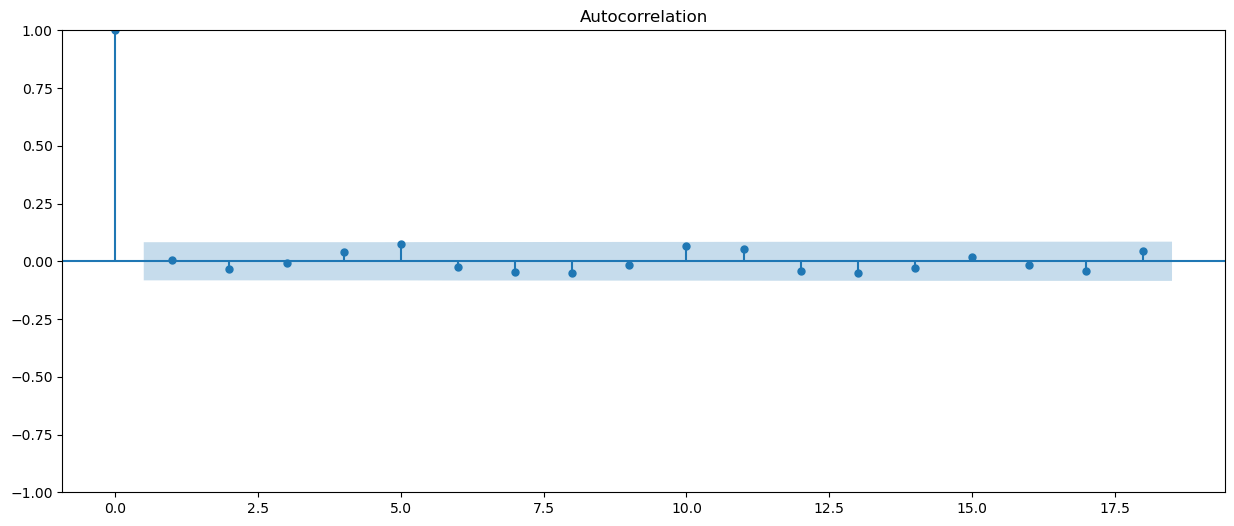

In [48]:
# autocorrelation plot to confirm our results
fig, ax = plt.subplots(figsize=(15, 6))
fig = sm.graphics.tsa.plot_acf(resid_arma_2_2, lags=18, ax=ax)


In [49]:
sm.stats.acorr_ljungbox(resid_arma_4_0, lags=18, return_df=True)

,lb_stat,lb_pvalue
1,0.022608,0.880481
2,0.160005,0.923114
3,0.284247,0.962964
4,0.286832,0.990648
5,0.827707,0.975233
6,1.626631,0.950644
7,3.507857,0.834393
8,4.859857,0.772444
9,5.277459,0.809482
10,7.568857,0.670869


In [50]:
# check that all lb_pvalues are > 0.05
all(sm.stats.acorr_ljungbox(resid_arma_4_0, lags=18, return_df=True).lb_pvalue > 0.05)

True

Après avoir effectué le test de Ljung-Box sur le modèle AR(4), on remarque que la p-value est supérieur au seuil significatif de 5% pour tous les 18 lags. Par conséquent, on ne peut pas rejeter l'hypothèse nulle que le terme d'erreur possède des autocorrélations de 0. Par conséquent, on peut conclure que le terme d'erreur du modèle AR(4) est un bruit blanc.

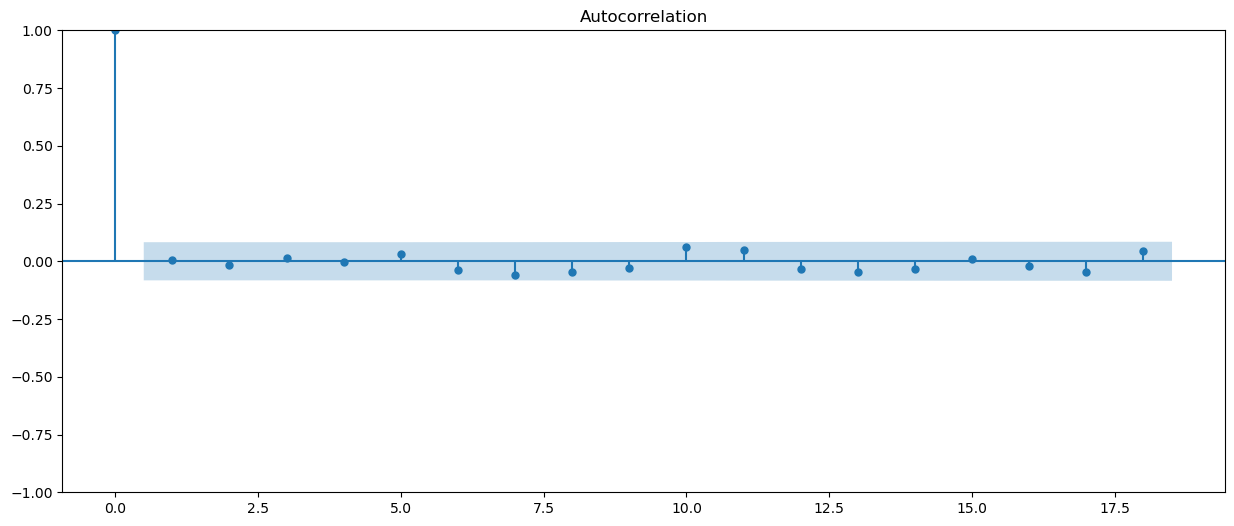

In [51]:
# autocorrelation plot
fig, ax = plt.subplots(figsize=(15, 6))
fig = sm.graphics.tsa.plot_acf(resid_arma_4_0, lags=18, ax=ax)

In [52]:
sm.stats.acorr_ljungbox(resid_arma_1_0, lags=18, return_df=True)

,lb_stat,lb_pvalue
1,4.261575,3.898377e-02
2,45.933833,1.060706e-10
3,50.167877,7.357811e-11
4,65.664649,1.863951e-13
5,65.689926,8.060455e-13
6,67.027592,1.661358e-12
7,69.662315,1.728765e-12
8,69.683916,5.680488e-12
9,70.341134,1.305289e-11
10,72.165245,1.690236e-11


In [53]:
# check that all lb_pvalues are < 0.05
all(sm.stats.acorr_ljungbox(resid_arma_1_0, lags=18, return_df=True).lb_pvalue < 0.05)

True

Après avoir effectué le test de Ljung-Box sur le modèle AR(1), on remarque que la p-value est inférieur au seuil significatif de 5% pour tous les 18 lags. Par conséquent, on peut rejeter l'hypothèse nulle que le terme d'erreur possède des autocorrélations de 0. Par conséquent, on peut conclure que le terme d'erreur du modèle AR(1) n'est pas un bruit blanc.

# Réponse dynamique et prédiction

3.a) Pour les deux modèles sélectionnés, évaluez la réponse dynamique pour un horizon de 10 périodes suite à un choc positif de taille $\sigma = 1.15$ survenant à la première période de l'horizon. Tracez les deux fonctions de réponse impulsionnelle sur la même figure et commentez.

In [54]:
sigma = 1.15

In [55]:
impulse_res_arma22 = arma_models["ARMA(2,2)"].impulse_responses(steps=10, impulse=[sigma])

In [56]:
impulse_res_arma40 = arma_models["ARMA(4,0)"].impulse_responses(steps=10, impulse=[sigma])

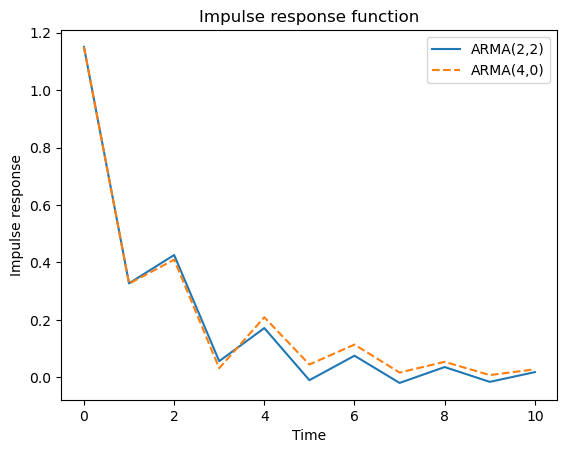

In [57]:
plt.plot(impulse_res_arma22, label="ARMA(2,2)")
plt.plot(impulse_res_arma40, label="ARMA(4,0)", linestyle="--")
plt.legend()
plt.title("Impulse response function")
plt.xlabel("Time")
plt.ylabel("Impulse response")
plt.show()

3.b) Un choc négatif de taille $\sigma = 1.15$ se produit pendant 3 périodes consécutives de l'horizon (t, t+1, t+2). Tracez les deux fonctions de réponse impulsionnelle pour les deux modèles sélectionnés,
montrant la réponse dynamique pour un horizon de 20 périodes après ces chocs, et expliquez ce qui se passe.

In [58]:
steps = 20

In [59]:
def compute_three_impulse(arma_model, sigma, steps):
    first_impulse = arma_model.impulse_responses(steps=steps, impulse=[-sigma])
    second_impulse = first_impulse
    second_impulse = pd.concat([pd.Series([0]), second_impulse], ignore_index=True)
    second_impulse = second_impulse[0:-1]
    third_impulse = first_impulse
    third_impulse = pd.concat([pd.Series([0, 0]), third_impulse], ignore_index=True)
    third_impulse = third_impulse[0:-2]
    total_impulse = first_impulse + second_impulse + third_impulse
    return total_impulse

In [60]:
arma22_total_impulse = compute_three_impulse(arma_models["ARMA(2,2)"], sigma, steps)
arma40_total_impulse = compute_three_impulse(arma_models["ARMA(4,0)"], sigma, steps)
arma22_total_impulse, arma40_total_impulse

(0    -1.150000
 1    -1.477488
 2    -1.903556
 3    -0.810223
 4    -0.654546
 5    -0.218952
 6    -0.237949
 7    -0.047132
 8    -0.092901
 9    -0.001931
 10   -0.039517
 11    0.006959
 12   -0.018343
 13    0.006604
 14   -0.009179
 15    0.004645
 16   -0.004858
 17    0.002953
 18   -0.002668
 19    0.001794
 20   -0.001499
 dtype: float64,
 0    -1.150000
 1    -1.476372
 2    -1.886231
 3    -0.768520
 4    -0.651631
 5    -0.286879
 6    -0.368997
 7    -0.176555
 8    -0.185910
 9    -0.079705
 10   -0.091030
 11   -0.040663
 12   -0.046680
 13   -0.020158
 14   -0.023260
 15   -0.009929
 16   -0.011730
 17   -0.004943
 18   -0.005900
 19   -0.002442
 20   -0.002966
 dtype: float64)

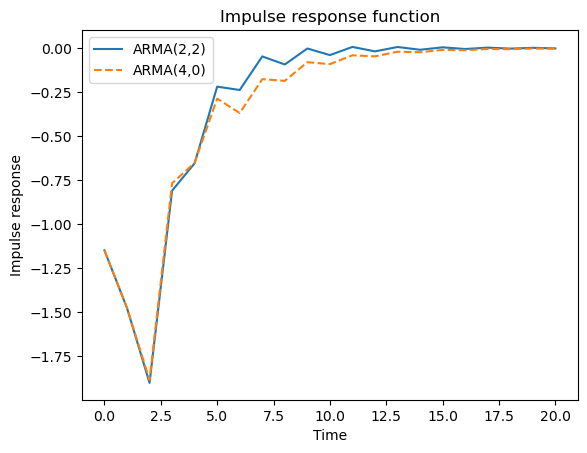

In [61]:
plt.plot(arma22_total_impulse, label="ARMA(2,2)")
plt.plot(arma40_total_impulse, label="ARMA(4,0)", linestyle="--")
plt.legend()
plt.title("Impulse response function")
plt.xlabel("Time")
plt.ylabel("Impulse response")
plt.show()

In [182]:
################# 3c #################
holdout_size = 34
training_size = len(df["stoch_USDCAD"]) - holdout_size

# divide sample
training_sample = df["stoch_USDCAD"][0:-holdout_size]
holdout_sample = df["stoch_USDCAD"][-holdout_size:]

# refit models on training sample
new_ar4_fit = ARIMA(training_sample.dropna(), order=(4,0,0)).fit()
new_arma22_fit = ARIMA(training_sample.dropna(), order=(2,0,2)).fit()

In [183]:
print(new_ar4_fit.predict(training_size+1))
print(new_arma22_fit.predict(training_size+1))

530   -0.186622
dtype: float64
530   -0.282074
dtype: float64


In [184]:
t = range(training_size+1, training_size+1+holdout_size)

# get predictions from both models
ar4_predictions, arma22_predictions = [], []
for i in t:
    ar4_predictions.append(new_ar4_fit.predict(i))
    arma22_predictions.append(new_arma22_fit.predict(i))

naive_prediction = [training_sample.iloc[-1]]*holdout_size

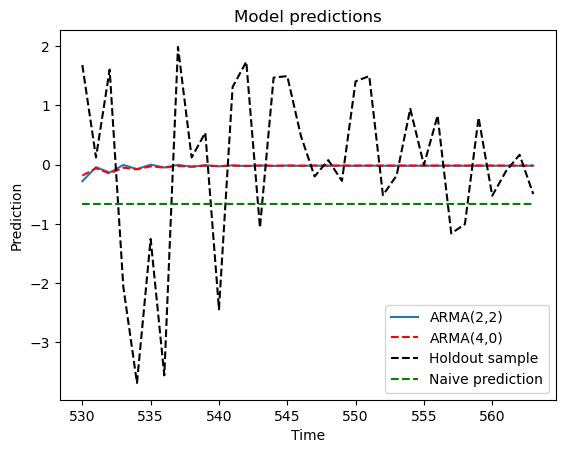

In [185]:
plt.plot(t, arma22_predictions, label="ARMA(2,2)")
plt.plot(t, ar4_predictions, label="ARMA(4,0)", color="red", linestyle="--")
plt.plot(holdout_sample, label="Holdout sample", color="black", linestyle="--")
plt.plot(t, naive_prediction, label="Naive prediction", color="green", linestyle="--")
plt.legend()
plt.title("Model predictions")
plt.xlabel("Time")
plt.ylabel("Prediction")
plt.show()

In [186]:
# divide sample
training_sample = df["log_100_USDCAD"][0:-holdout_size]
holdout_sample = df["log_100_USDCAD"][-holdout_size:]

# refit models on training sample
new_ar4_fit = ARIMA(training_sample.dropna(), order=(4,0,0)).fit()
new_arma22_fit = ARIMA(training_sample.dropna(), order=(2,0,2)).fit()

In [187]:
# get predictions from both models
ar4_predictions, arma22_predictions = [], []
for i in t:
    ar4_predictions.append(new_ar4_fit.predict(i))
    arma22_predictions.append(new_arma22_fit.predict(i))

naive_prediction = [training_sample.iloc[-1]]*holdout_size

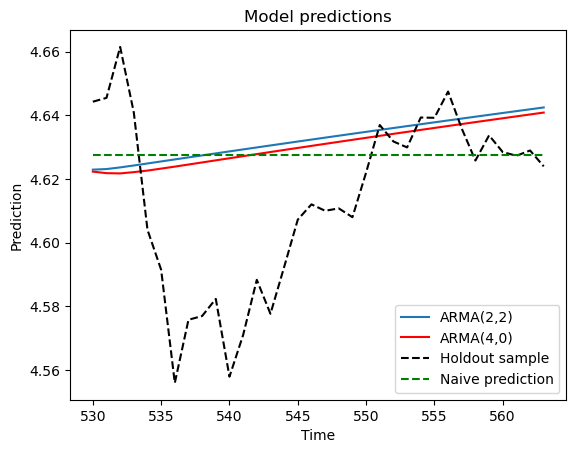

In [188]:
plt.plot(t, arma22_predictions, label="ARMA(2,2)")
plt.plot(t, ar4_predictions, label="ARMA(4,0)", color="red")
plt.plot(t, holdout_sample, label="Holdout sample", color="black", linestyle="--")
plt.plot(t, naive_prediction, label="Naive prediction", color="green", linestyle="--")
plt.legend()
plt.title("Model predictions")
plt.xlabel("Time")
plt.ylabel("Prediction")
plt.show()

In [ ]:
################# 3d #################